# TUGAS 1

In [2]:
import numpy as np                                                 
import pandas as pd                                                
import matplotlib.pyplot as plt                                    
import seaborn as sns                                             
%matplotlib inline
sns.set()

from subprocess import check_output

In [3]:
# membaca data
data = pd.read_excel('C:/Users/ASUS/Documents/data mining/car sale advertisements.xls')
data

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


## Statistika Deskriptif 

In [4]:
# mengecek statdes data sebelum dibersihkan
desc=["price", "mileage", "engV"]
data[desc].describe()

,price,mileage,engV
count,9.576000e+03,9576.000000,9142.000000
mean,2.764549e+06,138.862364,2.646344
std,6.948074e+07,98.629754,5.927699
min,0.000000e+00,0.000000,0.100000
25%,4.999000e+03,70.000000,1.600000
50%,9.200000e+03,128.000000,2.000000
75%,1.699225e+04,194.000000,2.500000
max,3.489914e+09,999.000000,99.990000


## Preprocessing Data

In [5]:
# untuk mengetahui tipe data masing-masing variabel
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [6]:
# mengecek missing value
np.sum(data.isnull())

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

terdapat 434 missing value pada variabel volume mesin (engV)
dan juga terdapat 511 missing value pada variabel tipe stir (drive).
karena missing value dari kedua variabel tidal lebih dari 30% data
maka tidak perlu dilakukan penghapusan variabel cukup dengan mengisi variabel tersebut

Text(0.5, 1.0, 'boxplot dari volume mesin')

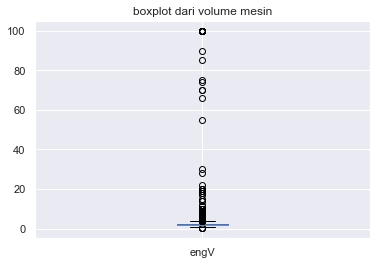

In [7]:
# cek outlier pada data volume mesin (engV)
data.boxplot(column='engV')
plt.title("boxplot dari volume mesin")

In [8]:
# Mengisi missing value dengan median pada variabel engV (karena variabel engV bertipe numerik dan terdapat outlier)
data['engV']=data['engV'].fillna((data['engV'].median()))

# Mengisi missing value dengan modus pada variabel drive (karena variabel drive bertipe kategorik)
data['drive']=data['drive'].fillna(data['engV'].mode()[0])

np.sum(data.isnull())

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [10]:
# mengecek missing value pada data baru
np.sum(data.isnull())

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

## Eksplorasi Data

In [11]:
#melakukan pengecekan statistika deskriptif pada data numerik yang sudah bersih
desc=["price", "mileage", "engV"]
data[desc].describe()

,price,mileage,engV
count,9.576000e+03,9576.000000,9576.000000
mean,2.764549e+06,138.862364,2.617051
std,6.948074e+07,98.629754,5.793361
min,0.000000e+00,0.000000,0.100000
25%,4.999000e+03,70.000000,1.600000
50%,9.200000e+03,128.000000,2.000000
75%,1.699225e+04,194.000000,2.500000
max,3.489914e+09,999.000000,99.990000


In [26]:
#melakukan pengecekan statistika deskriptif pada data kategorik yang sudah bersih
sd=["car","body","engType","model","drive"]
data[sd].describe()

,car,body,engType,model,drive
count,9576,9576,9576,9576,9576
unique,87,6,4,888,4
top,Volkswagen,sedan,Petrol,E-Class,front
freq,936,3646,4379,199,5188


## Visualisasi Data

Text(0.5, 1.0, 'Top 10 car brands on sale')

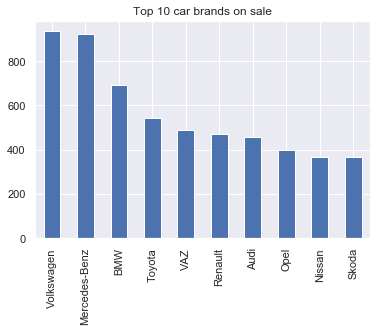

In [14]:
data.car.value_counts().head(10).plot.bar()
plt.title("Top 10 car brands on sale")

In [15]:
data_c = data['car'].value_counts() 
data_c.head(10)

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
VAZ              489
Renault          469
Audi             457
Opel             400
Nissan           368
Skoda            368
Name: car, dtype: int64

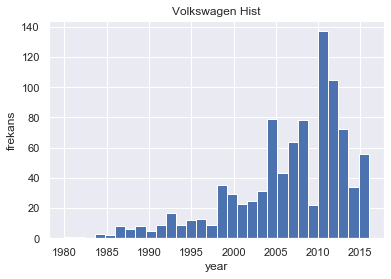

In [16]:
volkswagen = data[data.car == 'Volkswagen']
plt.hist(volkswagen.year, bins = 30)
plt.xlabel("year")
plt.ylabel("frekans")
plt.title("Volkswagen Hist")
plt.show()

Text(0.5, 1.0, 'Most preferred body type used in 1953-2016')

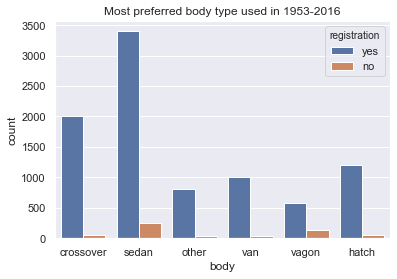

In [17]:
# visualisasi badan mobil yang paling banyak digunakan
sns.countplot(x='body', data=data, orient='h', hue='registration')
plt.title("Most preferred body type used in 1953-2016")

Text(0.5, 1.0, 'Most preferred engType used over the years')

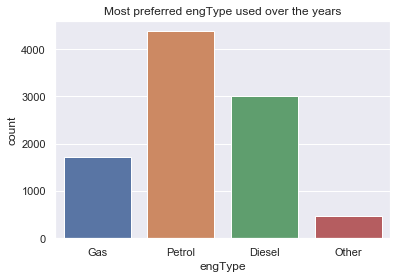

In [18]:
#visualisasi bahan bakar yang paling banyak digunakan
sns.countplot(x='engType', data=data, orient='h')
plt.title("Most preferred engType used over the years")

In [19]:
data_bb = data['engType'].value_counts() 
data_bb

Petrol    4379
Diesel    3013
Gas       1722
Other      462
Name: engType, dtype: int64

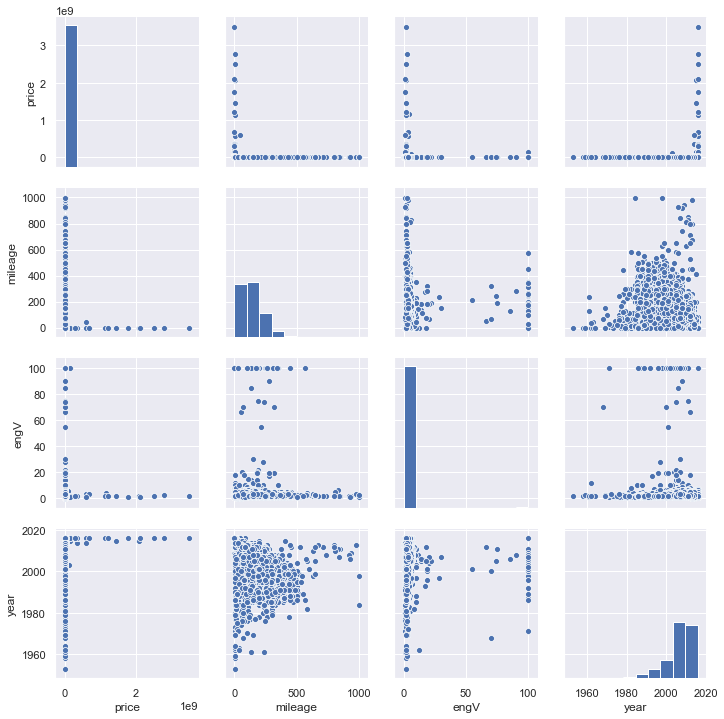

In [20]:
# Visualisasi hubungan antar variabel
num_var=['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration', 'year', 'model', 'drive']
sns.pairplot(data[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

Text(0.5, 1.0, 'year - price lineplot (2010 - 2016)')

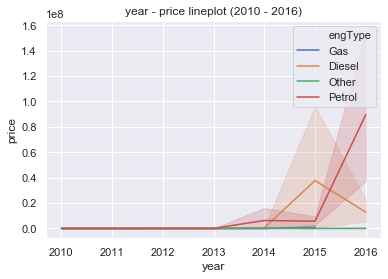

In [21]:
sns.lineplot(data=data[data.year >= 2010], y='price', x='year', hue='engType')
plt.title("year - price lineplot (2010 - 2016)")

Text(0.5, 1.0, 'year - price lineplot (2010 - 2016)')

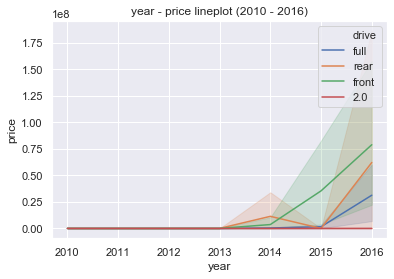

In [22]:
sns.lineplot(data=data[data.year >= 2010], y='price', x='year', hue='drive')
plt.title("year - price lineplot (2010 - 2016)")

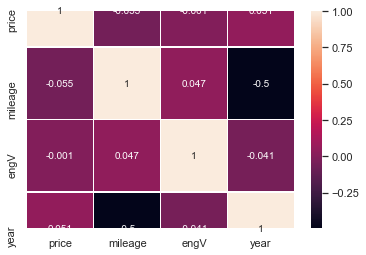

In [23]:
sns.heatmap(data.corr(),annot=True, linewidths=.5)
plt.show()

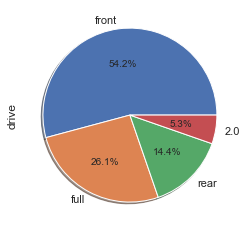

In [24]:
drivetype = data['drive'].value_counts()
drivetype.plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

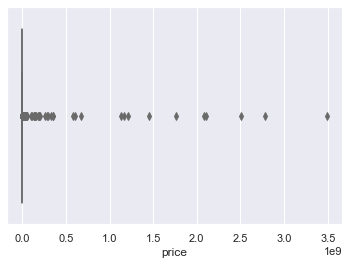

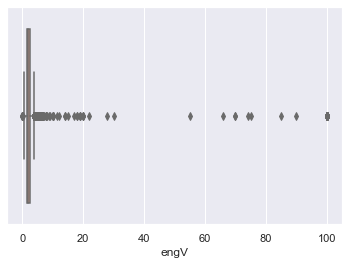

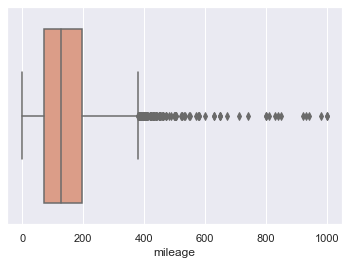

In [25]:
sns.boxplot(data['price'],color='darksalmon')
plt.show()
sns.boxplot(data['engV'],color='darksalmon')
plt.show()
sns.boxplot(data['mileage'],color='darksalmon')
plt.show()

terdapat banyak data yang berada di luar box akan tetapi tidak diketahui apakah data tersebut merupakan outlier ataukah data yang benar adanya